In [2]:
import random
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [ ]:
# Defining square trick for moving a line closer to a point
def square_trick(m, b, r, p, alpha):
    """ This function returns the slope and intercept of a line closer to the point (r, p)
    
    Args:
        m (float): Slope of the line 
        b (float): y-intercept of the line
        r (float): Feature in dataset
        p (float): Label in dataset
        alpha (+ve float): Learning rate
    
    Returns:
        tupple: Improved slope m1 and improved y-intercept b1
    """
    
    p_hat = (r*m) + b
    
    return (m + (alpha*r*(p-p_hat)), b + (alpha*(p-p_hat)))
    
    # Observation below doesn't happen here when point (r, p) is on the line. p-p_hat becomes zero so we don't 
    # move the line.

In [ ]:
# Defining the absolute trick for moving line closer to a point
def abs_trick(m, b, r, p, alpha):
    """This function returns the slope and intercept of a line closer to the point (r, p)
    
    Args:
        m (float): Slope of the line 
        b (float): y-intercept of the line
        r (float): Feature in dataset
        p (float): Label in dataset
        alpha (+ve float): Learning rate
    
    Returns:
        tupple: Improved slope m1 and improved y-intercept b1
    """
    
    p_hat = (r*m) + b
    
    if p > p_hat:
        return (m + (alpha*r), b + alpha)
    elif p < p_hat:
        return (m - (alpha*r), b - alpha)
    
    # One thing to note here is that if the point (r, p) is actually on the line, then we are essentially 
    # going to be moving the line away from the point and not closer
    return (m, b) # Now seems all is settled    

In [ ]:
# Defining the linear regression algorithm
def linear_reg_1(r_values, p_values, alpha=0.01, epochs=1000):
    """This function returns the slope and intercept of a line that fit the data points provided
    
    Args:
        r_values(list): List of features in our dataset. Length = N
        p_values(list): List of labels in our dataset. Length = N
        alpha(float): Learning rate of our algorithm
        epochs(int): Number of iteration of our algorithm
        
    Returns:
        tupple: Slope m and y-intercept b or our model
    """
    
    # Pick random slope and intercept to begin with
    m = random.random()
    b = random.random()
    
    #Length of lists
    N = len(r_values)
    
    for _ in range(epochs):
        index = random.randint(0, N-1)
        r = r_values[index]
        p = p_values[index]
        
        m,b = square_trick(m, b, r, p, alpha)
    
    return (m, b)

In [ ]:
# Generalized square trick
def square_trick_gen1(weight_list, bias, label, feature_list, alpha):
    """This is a more generalized version of the square trick that moves a line with 'weights' and 'bias' close
    to point(x, y)
    
    Args:
        weight_list(list): List of weight associated with features x. Length = N
        bias(float): y-intercept of the line
        label(float): Label of the point
        feature_list(list): List of features of the point. Length = N
        alpha(float): Learning rate
        
    Returns:
        tupple: List of modified weights and bias
    """
    
    # Get number of features
    N = len(feature_list)
    
    # Calculating value for y hat
    y_hat = bias
    for i in range(N):
        y_hat += weight_list[i]*feature_list[i]
        
    bias += alpha * (label - y_hat)
    
    for i in range(N):
        weight_list[i] += alpha*feature_list[i]*(label - y_hat)
    
    return weight_list, bias

In [ ]:
# Generalization of the linear regression algorithm
def linear_reg_gen1(features, label, alpha=0.01, epoch=1000):
    """This function returns the slope and intercept of a line that fit the data points provided
    
    Args:
        features(NxM list): Matrix list of features in our dataset. No. of features = N
                                                                    No. of datapoints = M
                             x1  x2  x3  x4                                    
                            [1,  3,  2,  6] - datapoint1
                            [2,  5,  2,  6] - datapoint2
                            [4,  7,  3,  2] - datapoint3  --> 4x3
                                    
        label(list): List of labels in our dataset. Length = M
        alpha(float): Learning rate of our algorithm
        epochs(int): Number of iteration of our algorithm
        
    Returns:
        tupple: List of weights for each feature and y-intercept of our model
    """
    # Get number of features
    N = len(features[0])
    # Get number of datapoints
    M = len(features)
    
    # First we gen random weights and bias for our features
    weights = [random.random() for _ in range(N)]
    bias = random.random()
    
    for _ in range(epoch):
        index = random.randint(0, M-1)
        weights, bias = square_trick_gen1(weights, bias, label[index], features[index], alpha)
        
    return weights, bias 

## Gradient Descent

In [79]:
def get_yhat(N, weight_list, feature_list, bias):
    yhat_i = 0
    for k in range(N):
        yhat_i += weight_list[k]*feature_list[k]
        yhat_i += bias
    return yhat_i

In [71]:
# Gradient descent step using square error
# With this we can train stochastically, using mini-batch, or batch.
def gradient_descent_square_error (weight_list, bias, label_list, feature_matrix, alpha):
    """This is a more generalized version of the square trick that moves a line with 'weights' and 'bias' close
    to point(x, y)
    
    Args:
        feature_matrix(NxM list): Matrix list of features in our dataset. No. of features = N
                                                                          No. of datapoints = M
                             x1  x2  x3  x4                                    
                            [1,  3,  2,  6] - datapoint1
                            [2,  5,  2,  6] - datapoint2
                            [4,  7,  3,  2] - datapoint3  --> 4x3
                                    
        label_list(list): List of labels in our dataset. Length = M
        weight_list(list): List of weight associated with features x. Length = N
        bias(float): y-intercept of the line
        alpha(float): Learning rate
        
    Returns:
        tupple: List of modified weights and bias
    """
    
    N = len(feature_matrix[0]) #  No. of features
    M = len(feature_matrix)    #  No. of datapoints
    
    # Batch gradient descent step for weights
    modified_weights = weight_list.copy()
    for j in range(N):
        wj = weight_list[j]
        
        sum_errors = 0 # Getting the sum of errors wrt each datapoint
        for i in range(M):
            yhat_i = get_yhat(N, weight_list, feature_matrix[i], bias)
            sum_errors += (yhat_i - label_list[i]) * feature_matrix[i][j]
            
        modified_weights[j] = wj - (alpha * sum_errors/M)
        
            
    # Batch gradient descent step for the bias
    modified_bias = 0
    sum_errors = 0 # Getting the sum of errors wrt each datapoint
    for i in range(M):
        yhat_i = get_yhat(N, weight_list, feature_matrix[i], bias)
        sum_errors += (yhat_i - label_list[i])

    modified_bias = bias - (alpha * sum_errors/M)
    
    return modified_weights, modified_bias

In [92]:
# Linear reg with gradient descent
def gd_linear_regression(features, label, alpha=0.01, epoch=1000, method='batch', batch_size=5):
    """This function returns the slope and intercept of a line that fit the data points provided
    
    Parameters:
        features(NxM list): Matrix list of features in our dataset. No. of features = N
                                                                    No. of datapoints = M
                             x1  x2  x3  x4                                    
                            [1,  3,  2,  6] - datapoint1
                            [2,  5,  2,  6] - datapoint2
                            [4,  7,  3,  2] - datapoint3  --> 4x3
                                    
        label(list): List of labels in our dataset. Length = M
    
    Hyperparameters:
        alpha(float): Learning rate of our algorithm
        epochs(int): Number of iteration of our algorithm
        method(str): How to train the model. batch, mini-batch, stochastic
        batch_size(int): If method = 'mini-batch', then provide the batch_size
        
    Returns:
        tupple: List of weights for each feature and y-intercept of our model
    """
    N = len(features[0]) # Get number of features
    M = len(features) # Get number of datapoints
    
    # First we gen random weights and bias for our features
    weights = [random.random() for _ in range(N)]
    bias = random.random()
    
    # Batch method
    for _ in range(epoch):
        if method == 'batch':
            print(weights, bias)
            weights, bias = gradient_descent_square_error(weights, bias, label, features, alpha)
        elif method == 'mini-batch':
            no_of_batch = M//batch_size
            batch_split_size = no_of_batch*batch_size
            batches = np.random.choice(batch_split_size,
                                      size=(no_of_batch, batch_size),
                                      replace=False)
            batches = np.append(batches, 
                                [[i if i < M else i-M for i in np.arange(batch_split_size, 
                                                                         (batch_split_size+batch_size), 
                                                                         1)]], 
                                axis=0)
            
            for batch_index in batches:
                weights, bias = gradient_descent_square_error(weights, bias, label[batch_index], features[batch_index], alpha)
        elif method == 'stochastic':
            for i in range(M):
                weights, bias = gradient_descent_square_error(weights, bias, label[i], features[i], alpha)
        
        else:
            print('Incorrect training method supplied')
            break
        
    return weights, bias 

In [108]:
features = [[1],[2],[3],[5],[6],[7]]
labels = [155, 197, 244, 112, 331, 212]

In [107]:
features

[[1], [2], [3], [5], [6], [7]]

In [109]:
m, b = gd_linear_regression(features, labels, alpha=0.01, epoch=10000)

[0.020652028887659046] 0.7634510655707296
[8.83751256696138] 2.839990473759516
[15.74916035083898] 4.543090066343465
[21.164276942345186] 5.952692751646471
[25.40388533086132] 7.131594746436199
[28.7201519059592] 8.129123385737383
[31.31115557663147] 8.98402607564164
[33.33248904776863] 9.726739591819966
[34.90637172755698] 10.38117263399102
[36.12880799850223] 10.966106038548832
[37.075210103936485] 11.496292658223254
[37.804814976127346] 11.983321327483562
[38.36415369462835] 12.436295515163632
[38.78977677713195] 12.862366412226862
[39.1103949200356] 13.267151677019315
[39.3485605694808] 13.655064363447698
[39.52198881058353] 14.02957129703399
[39.64459493784824] 14.393396031640307
[39.72730947609399] 14.748678273809976
[39.778718386748835] 15.097099112028117
[39.805565955672954] 15.439979385437882
[39.813149816083026] 15.778356953356585
[39.80563124262493] 16.1130473911797
[39.786278890168596] 16.444691667562903
[39.757660252831236] 16.77379359528053
[39.72179205676822] 17.10074924

[13.206511018771158] 153.1799862918717
[13.201632623216918] 153.20492598820215
[13.196764841557336] 153.22981142339145
[13.191907650699829] 153.25464271549524
[13.187061027602054] 153.2794199823123
[13.182224949271804] 153.3041433413851
[13.177399392766894] 153.32881291000038
[13.172584335195054] 153.3534288051897
[13.167779753713821] 153.37799114373001
[13.162985625530432] 153.40250004214417
[13.15820192790171] 153.42695561670152
[13.153428638133962] 153.45135798341843
[13.148665733582872] 153.4757072580589
[13.14391319165339] 153.500003556135
[13.139170989799622] 153.5242469929075
[13.134439105524732] 153.54843768338645
[13.129717516380829] 153.5725757423316
[13.12500619996886] 153.59666128425303
[13.120305133938508] 153.62069442341175
[13.11561429598808] 153.6446752738201
[13.110933663864406] 153.66860394924237
[13.106263215362734] 153.69248056319537
[13.10160292832662] 153.7163052289489
[13.09695278064783] 153.74007805952635
[13.092312750266224] 153.76379916770517
[13.0876828151696

[11.241359169660122] 163.2263816313019
[11.240756342678287] 163.2294634482025
[11.240154827263341] 163.23253856001332
[11.239554620561718] 163.23560698132266
[11.238955719726055] 163.23866872668697
[11.238358121915192] 163.24172381063104
[11.237761824294145] 163.24477224764811
[11.237166824034096] 163.24781405219986
[11.23657311831239] 163.25084923871648
[11.235980704312503] 163.25387782159683
[11.235389579224046] 163.25689981520836
[11.234799740242742] 163.2599152338873
[11.234211184570416] 163.26292409193874
[11.23362390941498] 163.26592640363654
[11.233037911990422] 163.26892218322357
[11.232453189516793] 163.27191144491172
[11.231869739220187] 163.27489420288194
[11.231287558332738] 163.2778704712843
[11.2307066440926] 163.28084026423815
[11.230126993743935] 163.28380359583207
[11.229548604536905] 163.286760480124
[11.22897147372765] 163.2897109311413
[11.228395598578285] 163.29265496288076
[11.227820976356876] 163.29559258930882
[11.227247604337435] 163.29852382436147
[11.22667547

[10.990193642299527] 164.51040870770439
[10.990137274582782] 164.51069687493535
[10.990081029504926] 164.51098441520267
[10.990024906799135] 164.51127132987045
[10.989968906199163] 164.51155762029978
[10.989913027439345] 164.51184328784882
[10.989857270254594] 164.51212833387277
[10.9898016343804] 164.51241275972384
[10.98974611955283] 164.5126965667514
[10.989690725508522] 164.51297975630177
[10.98963545198469] 164.51326232971843
[10.989580298719117] 164.51354428834185
[10.989525265450158] 164.51382563350967
[10.989470351916738] 164.51410636655658
[10.989415557858349] 164.51438648881435
[10.989360883015049] 164.5146660016119
[10.989306327127464] 164.51494490627516
[10.989251889936781] 164.51522320412732
[10.989197571184754] 164.5155008964886
[10.989143370613695] 164.5157779846763
[10.989089287966479] 164.516054470005
[10.98903532298654] 164.5163303537863
[10.98898147541787] 164.51660563732895
[10.988927745005018] 164.51688032193894
[10.98887413149309] 164.51715440891934
[10.9888206346

[10.967046455591104] 164.62874347596858
[10.967040449063532] 164.62877418298524
[10.967034455604326] 164.62880482319284
[10.967028475185051] 164.62883539673675
[10.967022507777337] 164.62886590376198
[10.967016553352876] 164.62889634441325
[10.967010611883419] 164.628926718835
[10.967004683340779] 164.6289570271713
[10.966998767696833] 164.62898726956595
[10.966992864923515] 164.6290174461624
[10.966986974992825] 164.62904755710383
[10.96698109787682] 164.62907760253307
[10.966975233547622] 164.62910758259267
[10.966969381977407] 164.62913749742484
[10.966963543138416] 164.6291673471715
[10.96695771700295] 164.62919713197422
[10.966951903543372] 164.62922685197435
[10.9669461027321] 164.62925650731287
[10.966940314541619] 164.62928609813045
[10.966934538944466] 164.62931562456748
[10.966928775913244] 164.62934508676403
[10.966923025420613] 164.62937448485985
[10.966917287439292] 164.62940381899443
[10.96691156194206] 164.62943308930693
[10.966905848901758] 164.62946229593618
[10.966900

[10.96451823371992] 164.641668439724
[10.964517727828843] 164.64167102597796
[10.964517223038431] 164.64167360660502
[10.964516719346287] 164.64167618161744
[10.964516216750024] 164.64167875102743
[10.964515715247256] 164.64168131484715
[10.964515214835604] 164.6416838730888
[10.964514715512694] 164.64168642576448
[10.964514217276157] 164.64168897288633
[10.964513720123632] 164.64169151446643
[10.964513224052757] 164.64169405051683
[10.96451272906118] 164.64169658104956
[10.964512235146554] 164.64169910607663
[10.964511742306534] 164.64170162561
[10.964511250538783] 164.64170413966164
[10.964510759840968] 164.64170664824348
[10.964510270210761] 164.64170915136742
[10.964509781645841] 164.6417116490453
[10.964509294143888] 164.64171414128901
[10.96450880770259] 164.64171662811037
[10.96450832231964] 164.64171910952118
[10.964507837992734] 164.6417215855332
[10.964507354719574] 164.64172405615815
[10.96450687249787] 164.64172652140778
[10.964506391325333] 164.6417289812938
[10.9645059111

[10.964316320290534] 164.64270067656457
[10.964316253701242] 164.6427010169873
[10.964316187256825] 164.6427013566694
[10.964316120956973] 164.64270169561243
[10.964316054801367] 164.64270203381804
[10.964315988789696] 164.6427023712878
[10.964315922921646] 164.64270270802334
[10.964315857196905] 164.64270304402623
[10.964315791615162] 164.6427033792981
[10.964315726176105] 164.64270371384052
[10.964315660879423] 164.64270404765506
[10.964315595724807] 164.64270438074334
[10.964315530711946] 164.64270471310692
[10.964315465840533] 164.64270504474737
[10.96431540111026] 164.64270537566628
[10.964315336520823] 164.6427057058652
[10.96431527207191] 164.64270603534573
[10.96431520776322] 164.6427063641094
[10.964315143594446] 164.64270669215776
[10.964315079565283] 164.6427070194924
[10.964315015675428] 164.64270734611486
[10.964314951924578] 164.6427076720267
[10.964314888312432] 164.64270799722945
[10.964314824838684] 164.64270832172465
[10.964314761503037] 164.64270864551386
[10.9643146

[10.96428966468265] 164.64283694734434
[10.964289656087795] 164.6428369912836
[10.96428964751164] 164.64283703512723
[10.964289638954146] 164.6428370788755
[10.96428963041527] 164.64283712252856
[10.964289621894972] 164.64283716608668
[10.96428961339321] 164.64283720955
[10.964289604909947] 164.64283725291878
[10.96428959644514] 164.6428372961932
[10.96428958799875] 164.64283733937344
[10.964289579570737] 164.64283738245976
[10.96428957116106] 164.64283742545234
[10.96428956276968] 164.6428374683514
[10.964289554396558] 164.6428375111571
[10.964289546041652] 164.64283755386967
[10.964289537704923] 164.6428375964893
[10.964289529386333] 164.64283763901622
[10.964289521085842] 164.6428376814506
[10.964289512803411] 164.64283772379267
[10.964289504539] 164.6428377660426
[10.964289496292569] 164.6428378082006
[10.96428948806408] 164.6428378502669
[10.964289479853495] 164.64283789224166
[10.964289471660774] 164.6428379341251
[10.964289463485876] 164.64283797591742
[10.964289455328766] 164.6

[10.964286196101327] 164.64285467968355
[10.964286195053043] 164.64285468504266
[10.964286194007041] 164.64285469039012
[10.964286192963314] 164.64285469572593
[10.96428619192186] 164.64285470105014
[10.96428619088267] 164.64285470636275
[10.96428618984574] 164.64285471166383
[10.964286188811068] 164.64285471695337
[10.964286187778645] 164.6428547222314
[10.96428618674847] 164.64285472749793
[10.964286185720535] 164.64285473275302
[10.964286184694837] 164.64285473799666
[10.964286183671371] 164.6428547432289
[10.964286182650131] 164.64285474844976
[10.964286181631113] 164.64285475365926
[10.964286180614312] 164.64285475885742
[10.964286179599725] 164.64285476404427
[10.964286178587344] 164.64285476921984
[10.964286177577165] 164.64285477438415
[10.964286176569185] 164.64285477953723
[10.964286175563398] 164.6428547846791
[10.964286174559799] 164.64285478980977
[10.964286173558383] 164.6428547949293
[10.964286172559145] 164.64285480003767
[10.964286171562081] 164.64285480513493
[10.9642

[10.964285767332917] 164.6428568716653
[10.964285767217502] 164.64285687225532
[10.96428576710234] 164.64285687284408
[10.964285766987427] 164.64285687343155
[10.964285766872763] 164.64285687401775
[10.964285766758348] 164.64285687460267
[10.964285766644183] 164.6428568751863
[10.964285766530265] 164.64285687576867
[10.964285766416596] 164.64285687634978
[10.964285766303174] 164.6428568769296
[10.96428576619] 164.6428568775082
[10.964285766077072] 164.64285687808552
[10.964285765964389] 164.64285687866158
[10.964285765851953] 164.64285687923638
[10.964285765739762] 164.64285687980993
[10.964285765627814] 164.64285688038223
[10.96428576551611] 164.6428568809533
[10.964285765404648] 164.64285688152313
[10.964285765293429] 164.6428568820917
[10.964285765182451] 164.64285688265906
[10.964285765071715] 164.64285688322516
[10.96428576496122] 164.64285688379005
[10.964285764850965] 164.6428568843537
[10.96428576474095] 164.64285688491614
[10.964285764631175] 164.64285688547733
[10.96428576452

In [110]:
m, b

([10.964285724870457], 164.64285708874502)

In [112]:
labels_hat = [(r[0]*m[0])+b for r in features]
feature_flat = [r[0] for r in features]

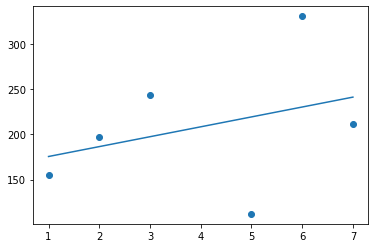

In [113]:
plt.scatter(feature_flat, labels)
plt.plot(feature_flat, labels_hat);

In [114]:
# Tested and it looks like we got something pretty neat for one feature and one label
# Not quite tested for multiple feature and one label.